# Forest Fires Data Set  from UCI Machine Learning Repository 

In [1]:
import pandas as pd
forest = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

# Printing basic data set information

In [2]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
forest["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [5]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Histogram

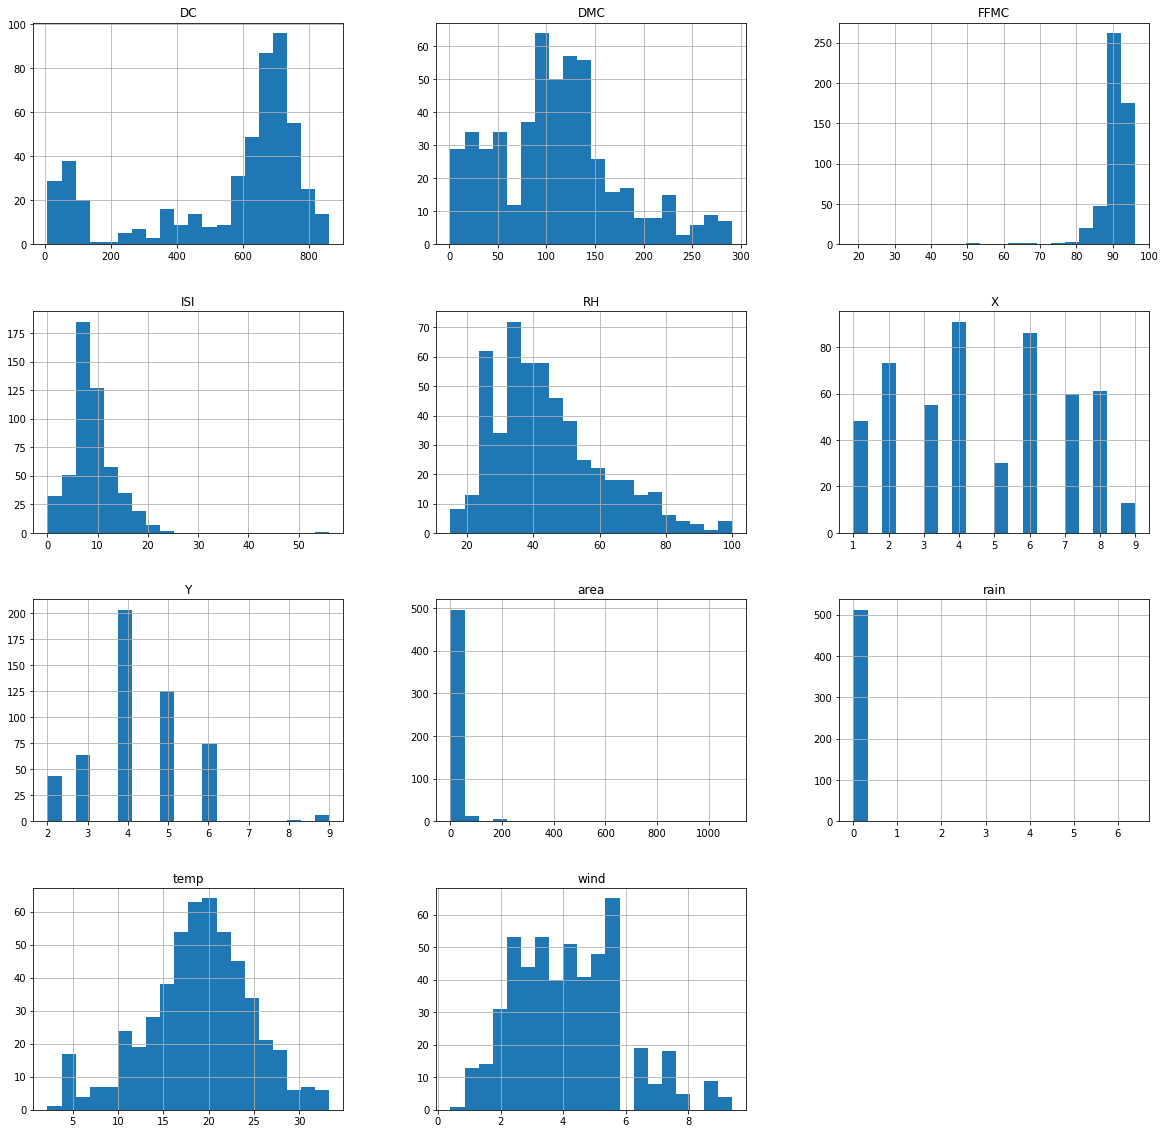

In [7]:
%matplotlib inline   
import matplotlib.pyplot as plt
forest.hist(bins=20, figsize=(20,20))
plt.show()

# Creating Test data & Training data

# Method 1

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(forest, 0.2)

In [14]:
print("Training data : ",len(train_set) , "  Test data : " , len(test_set))

Training data :  414   Test data :  103


# Method 2

In [15]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
forest_with_id = forest.reset_index() 
train_set, test_set = split_train_test_by_id(forest_with_id, 0.2, "index")

In [17]:
print("Training data : ",len(train_set) , "  Test data : " , len(test_set))

Training data :  421   Test data :  96


# Method 3

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(forest, test_size=0.2, random_state=42)

In [19]:
print("Training data : ",len(train_set) , "  Test data : " , len(test_set))

Training data :  413   Test data :  104


In [20]:
forest["forest_area"] = np.ceil(forest["X"] * forest["Y"] )

In [21]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,21.609284
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,14.803040
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,2.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,12.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,18.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,30.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,81.000000


In [26]:
forest["forest_area"].where(forest["forest_area"] < 40, 40, inplace=True)

In [27]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,25.110251
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,15.320650
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,2.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,12.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,18.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,40.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,40.000000


In [28]:
del forest["forest_area"]

In [29]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Method 4

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(forest, forest["X"]):
    strat_train_set = forest.loc[train_index]
    strat_test_set = forest.loc[test_index]

In [36]:
print("Training data : ",len(strat_train_set) , "  Test data : " , len(strat_test_set))

Training data :  413   Test data :  104


In [37]:
strat_test_set["X"].value_counts()

4    18
6    17
2    15
8    12
7    12
3    11
1    10
5     6
9     3
Name: X, dtype: int64

In [38]:
strat_test_set["Y"].value_counts()

4    36
5    26
6    18
3    12
2     9
9     3
Name: Y, dtype: int64

In [39]:
strat_train_set["X"].value_counts()

4    73
6    69
2    58
8    49
7    48
3    44
1    38
5    24
9    10
Name: X, dtype: int64

In [40]:
strat_train_set["Y"].value_counts()

4    167
5     99
6     56
3     52
2     35
9      3
8      1
Name: Y, dtype: int64

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("X", axis=1, inplace=True)

In [42]:
forest = strat_train_set.copy()

In [43]:
forest.describe()

,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,4.261501,90.780630,112.595884,555.691041,9.047458,18.960533,44.038741,3.975545,0.022760,13.129758
std,1.184198,4.630609,63.745024,243.595718,4.120376,5.724006,15.719120,1.790592,0.325256,69.641538
min,2.000000,50.400000,2.400000,7.900000,0.400000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,4.000000,90.200000,73.400000,466.600000,6.500000,15.800000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,91.600000,108.400000,664.500000,8.400000,19.300000,41.000000,4.000000,0.000000,0.470000
75%,5.000000,92.900000,142.400000,714.300000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,96.200000,291.300000,860.600000,22.600000,33.300000,99.000000,9.400000,6.400000,1090.840000


# Different Plots

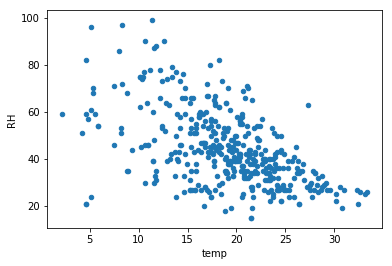

In [45]:
forest.plot(kind="scatter", x="temp", y="RH")

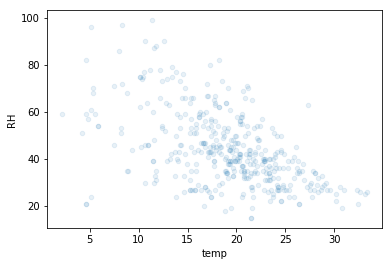

In [46]:
forest.plot(kind="scatter", x="temp", y="RH", alpha=0.1)

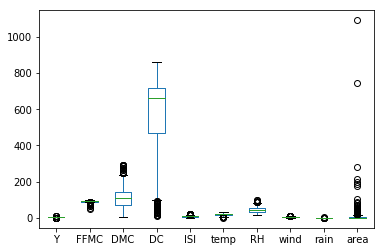

In [59]:
forest.plot.box( by="temp")

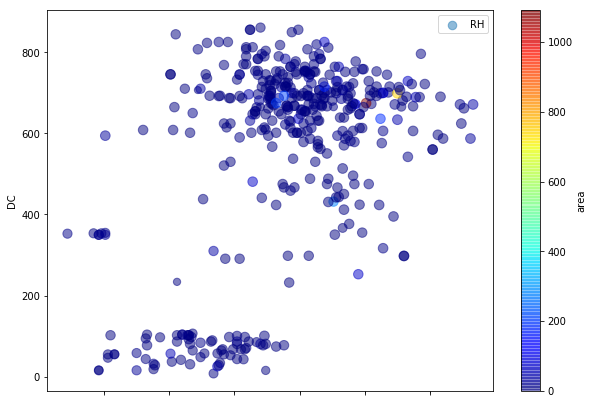

In [67]:
forest.plot(kind="scatter", x="temp", y="DC", alpha=0.5,
    s=forest["FFMC"], label="RH", figsize=(10,7),
    c="area", cmap=plt.get_cmap("jet"), colorbar=True,
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298668E99B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029867CA5438>]], dtype=object)

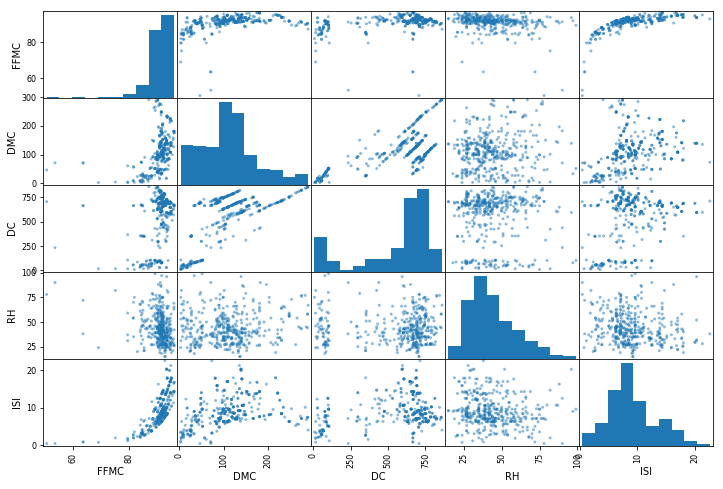

In [72]:
from pandas.plotting import scatter_matrix

attributes = ["FFMC", "DMC", "DC", "RH","ISI"]
scatter_matrix(forest[attributes], figsize=(12, 8))

# Correlation

In [68]:
corr_matrix = forest.corr()

In [69]:
corr_matrix["temp"].sort_values(ascending=False)

temp    1.000000
DC      0.484612
DMC     0.454086
FFMC    0.439863
ISI     0.429463
area    0.105670
rain    0.072709
Y      -0.019421
wind   -0.228517
RH     -0.531172
Name: temp, dtype: float64

In [70]:
corr_matrix["wind"].sort_values(ascending=False)

wind    1.000000
ISI     0.093331
RH      0.064735
rain    0.053469
area    0.006728
Y      -0.014605
FFMC   -0.113499
DMC    -0.129948
DC     -0.219634
temp   -0.228517
Name: wind, dtype: float64

In [71]:
corr_matrix["rain"].sort_values(ascending=False)

rain    1.000000
RH      0.097622
temp    0.072709
DMC     0.069642
ISI     0.068593
FFMC    0.066076
wind    0.053469
Y       0.034923
DC      0.031685
area   -0.005479
Name: rain, dtype: float64